# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.plot_model_changes import plot_changes
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_2_vec import word_2_vec_
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import false_true_positive, false_true_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate,false_negative_rate, false_positive_rate, performance_metrics_data_frame
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Corpus = pd.read_excel('original_dataset.xlsx')
Corpus.rename(columns={'rating': 'Sentiment', 'review_description': 'Review'}, inplace=True)
Corpus.drop(columns=['company', 'Unnamed: 0'], inplace=True)
Corpus['Review'] = Corpus['Review'].astype(str)

In [5]:
Data = pd.read_csv('ArabicData.csv') # This Data Will Be Use For Word2Vec

# Sentiment Information

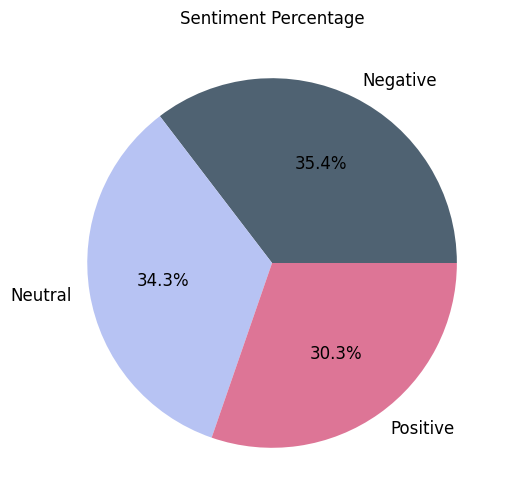

In [6]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

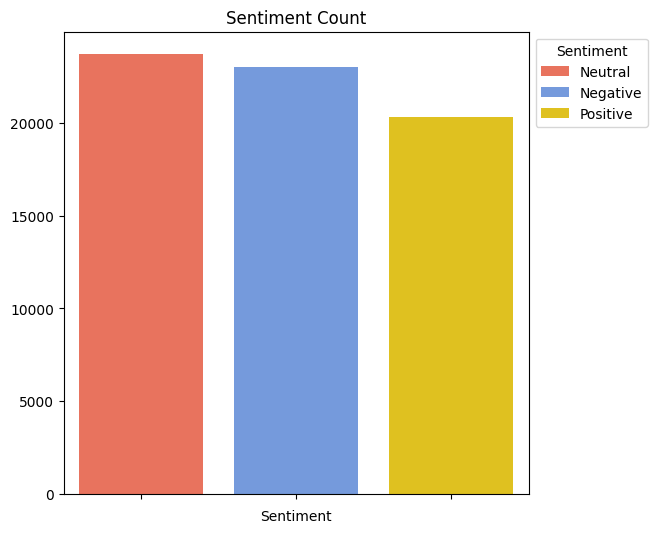

In [7]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

121704

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

2

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

176

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Number Of Words Before Text Normalization

In [12]:
Corpus["Number of Words 1"] = Corpus["Review"].apply(lambda n:len(word_tokenize(n)))
Corpus["Number of Words 1"].sum()

1680722

# Average Number Of Words Before Text Normalization

In [13]:
AverageNaumberOfWords1 = int(np.round((Corpus["Number of Words 1"].mean())))
AverageNaumberOfWords1

25

# Maximum Number Of Word Before Text Normalization

In [14]:
MaximumNaumberOfWords1 = Corpus["Number of Words 1"].max()
MaximumNaumberOfWords1

1601

# Minimum Number Of Words Before Text Normalization

In [15]:
MimimumNaumberOfWords1 = Corpus["Number of Words 1"].min()
MimimumNaumberOfWords1

1

# Number Of Charachters Before Text Normalization

In [16]:
Corpus["Number of Charachters 1"] = Corpus["Review"].str.len()
Corpus["Number of Charachters 1"].sum()

8721971

# Average Number Of Charachters Before Text Normalization

In [17]:
AverageNumberOfCharachters1 = int(np.round(Corpus["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1

130

# Maximum Number Of Charachters Before Text Normalization

In [18]:
MaximumNumberOfCharachters1 = Corpus['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1

8101

# Minimum Number Of Charachters Before Text Normalization

In [19]:
MinimumNumberOfCharachters1 = Corpus['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1

1

# Most Frequent Words Before Text Normalization

In [20]:
MostFrequentWord1 = Counter((Corpus['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1

,Word,Count
1,من,34702
2,في,31843
3,و,24583
4,.,15871
5,لا,12888
6,على,12887
7,جدا,12581
8,ما,10910
9,..,10097
10,عن,8739


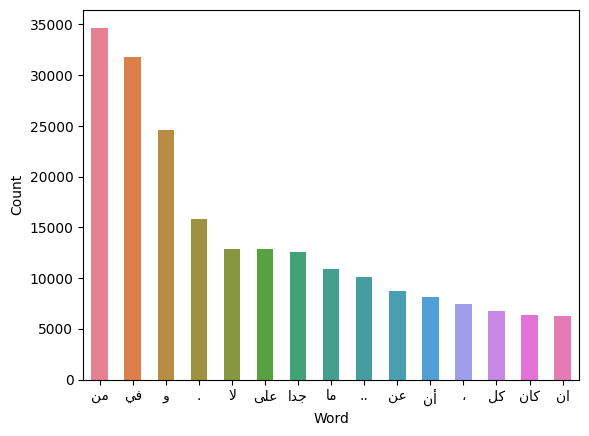

In [21]:
bar_plot(data=MostFrequentWordDF1, text = 'Word', x = 'Word', y='Count')

# Text Normalization

In [22]:
text_normalization = TextNormalization(remove_emojis = True,
                                        remove_hashtags = True,
                                        remove_emails = True ,
                                        remove_url = True,
                                        remove_mention = True,
                                        remove_duplicate_char = True,
                                        remove_single_char = True,
                                        remove_special_character = True,
                                        remove_new_line_char = True,
                                        remove_number = True,
                                        remove_html_tags = True,
                                        remove_arabic_diacritics = True,
                                        normalize_unicode_ar = True,
                                        normalize_alef_maksura_ar = True,
                                        normalize_alef_ar = True,
                                        normalize_teh_marbuta_ar = True,
                                        remove_non_arabic = True,
                                        remove_whitespace = True,
                                        remove_unicode_characters = True,
                                        remove_longest_than = True,
                                        remove_stop_words = True,
                                        lemmatizer = False,
                                        stemmer = True)

In [23]:
Corpus['Normalized_Review'] = Corpus['Review'].apply(lambda x: text_normalization.normalization(x))

In [24]:
Corpus.dropna(axis=1, inplace=True)

# Number Of Unique Words

In [25]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

53101

# WordCloud

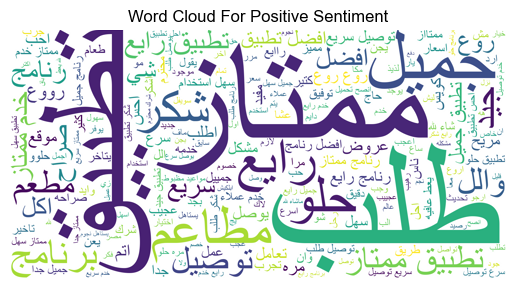

In [26]:
wordcloud(data=Corpus, target='Positive', width=2000, hieght=1000, review='Normalized_Review')

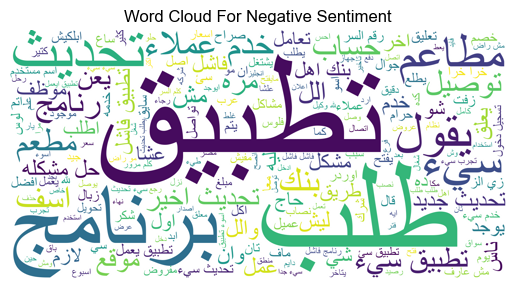

In [27]:
wordcloud(data=Corpus, target='Negative', width=2000, hieght=1000, review='Normalized_Review')

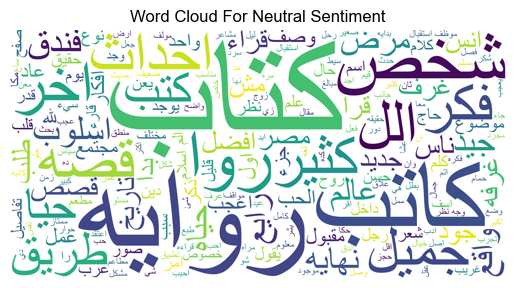

In [28]:
wordcloud(data=Corpus, target='Neutral', width=2000, hieght=1000, review='Normalized_Review')

# Number Of Words After Text Normalization

In [29]:
Corpus["Number of Words 2"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[Corpus["Number of Words 2"] == 0].index, inplace = True)
Corpus["Number of Words 2"].sum()

1039837

# Average Number Of Words After Text Normalization

In [30]:
AverageNaumberOfWords2 = int(np.round((Corpus["Number of Words 2"].mean())))
AverageNaumberOfWords2

16

# Maximum Number Of Word After Text Normalization

In [31]:
MaximumNaumberOfWords2 = Corpus["Number of Words 2"].max()
MaximumNaumberOfWords2

922

# Minimum Number Of Words After Text Normalization

In [32]:
MimimumNaumberOfWords2 = Corpus["Number of Words 2"].min()
MimimumNaumberOfWords2

1

# Number Of Charachters After Text Normalization

In [33]:
Corpus["Number of Charachters 2"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters 2"].sum()

5058765

# Average Number Of Charachters After Text Normalization

In [34]:
AverageNumberOfCharachters2 = int(np.round(Corpus["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2

78

# Maximum Number Of Charachters After Text Normalization

In [35]:
MaximumNumberOfCharachters2 = Corpus['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2

4610

# Minimum Number Of Charachters After Text Normalization

In [36]:
MinimumNumberOfCharachters2 = Corpus['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2

1

# Most Frequent Words After Text Normalization

In [37]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2

,Word,Count
1,تطبيق,11564
2,كتاب,9313
3,طلب,8033
4,روايه,6052
5,سيء,5324
6,خدم,4977
7,ممتاز,4931
8,جيد,4756
9,جميل,4584
10,تحديث,4150


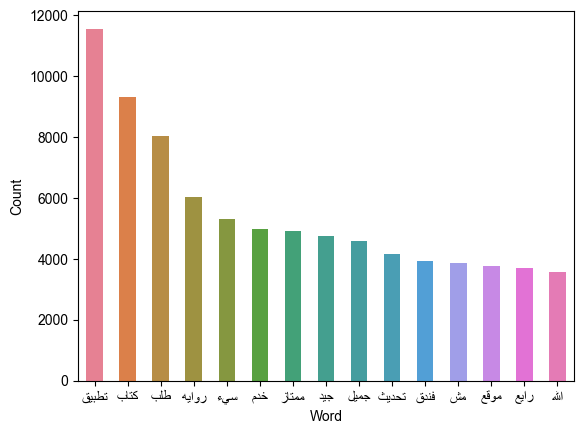

In [38]:
bar_plot(data=MostFrequentWordDF2, text = 'Word', x = 'Word', y='Count')

# Split The Dataset Into X And y

In [39]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# CountVectorizer

In [41]:
CountVectorizer_ = CountVectorizer()
X_train_CV_ = CountVectorizer_.fit_transform(X_train)
X_test_CV_ = CountVectorizer_.transform(X_test)

# Machine Learning

**1-Naive Bayes**

In [42]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_CV_, y_train=y_train)

MultinomialNB(alpha=1)

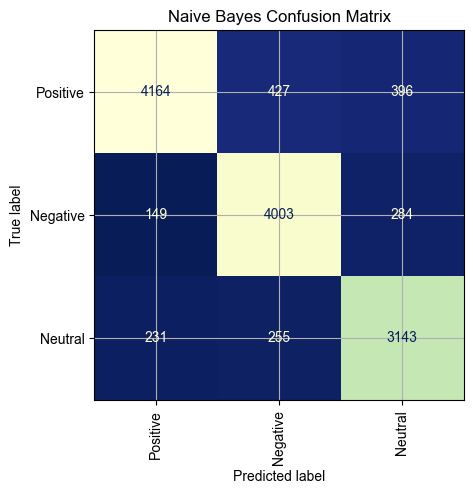

In [43]:
y_predNB = Naive_Bayes.predict(X_test_CV_)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusionmatrix = ConfusionMatrixNB, name = 'Naive Bayes')

In [44]:
False_PositiveNB, True_PositiveNB = false_true_positive(Confusin_Matrix = ConfusionMatrixNB)
False_NegativeNB, True_NegativeNB = false_true_negative(Confusin_Matrix = ConfusionMatrixNB)

In [45]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

FalseNegativeRateNB = false_negative_rate(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
FalsePositiveRateNB = false_positive_rate(False_Positive =False_PositiveNB,  True_Negative = True_NegativeNB)

In [46]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB, False_Negative_Rate = FalseNegativeRateNB, False_Positive_Rate = FalsePositiveRateNB)

,Values
Accuracy,0.911023
Precision,0.866534
Sensitivity,0.866534
Specificity,0.933267
F1Score,0.866534
Error,0.088977
False Negative Rate,0.133466
False Positive Rate,0.066733


**2-Logistic Regression**

In [47]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_CV_, y_train=y_train)


LogisticRegression()

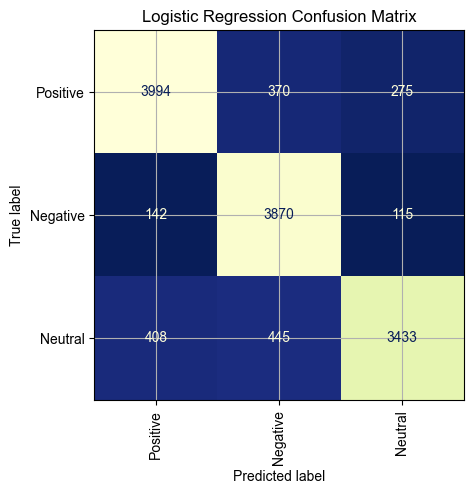

In [48]:
y_predLR = Logistic_Regression.predict(X_test_CV_)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusionmatrix = ConfusionMatrixLR, name = 'Logistic Regression')

In [49]:
False_PositiveLR, True_PositiveLR = false_true_positive(Confusin_Matrix = ConfusionMatrixLR)
False_NegativeLR, True_NegativeLR = false_true_negative(Confusin_Matrix = ConfusionMatrixLR)

In [50]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

FalseNegativeRateLR = false_negative_rate(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
FalsePositiveRateLR = false_positive_rate(False_Positive =False_PositiveLR,  True_Negative = True_NegativeLR)



In [51]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR, False_Negative_Rate = FalseNegativeRateLR, False_Positive_Rate = FalsePositiveRateLR)

,Values
Accuracy,0.910359
Precision,0.865538
Sensitivity,0.865538
Specificity,0.932769
F1Score,0.865538
Error,0.089641
False Negative Rate,0.134462
False Positive Rate,0.067231


**3-Decision Tree**

In [52]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_CV_, y_train=y_train)

DecisionTreeClassifier()

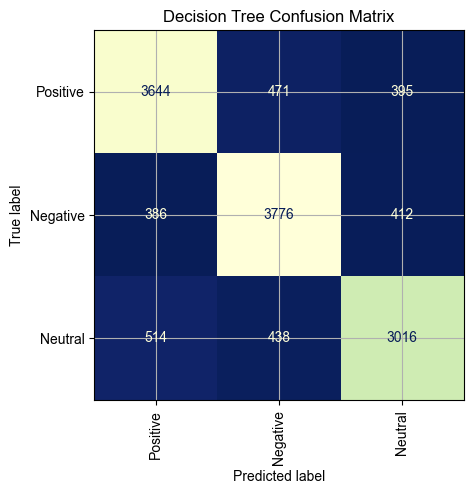

In [53]:
y_predDT = Decision_Tree.predict(X_test_CV_)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusionmatrix = ConfusionMatrixDT, name = 'Decision Tree')

In [54]:
False_PositiveDT, True_PositiveDT = false_true_positive(Confusin_Matrix = ConfusionMatrixDT)
False_NegativeDT, True_NegativeDT = false_true_negative(Confusin_Matrix = ConfusionMatrixDT)

In [55]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

FalseNegativeRateDT = false_negative_rate(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
FalsePositiveRateDT = false_positive_rate(False_Positive =False_PositiveDT,  True_Negative = True_NegativeDT)

In [56]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT, False_Negative_Rate = FalseNegativeRateDT, False_Positive_Rate = FalsePositiveRateDT)

,Values
Accuracy,0.866381
Precision,0.799571
Sensitivity,0.799571
Specificity,0.899785
F1Score,0.799571
Error,0.133619
False Negative Rate,0.200429
False Positive Rate,0.100215


**4-K Nearest Neighbors**

In [57]:
Algorithm =KNeighborsClassifier(metric='manhattan', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_CV_, y_train=y_train)

KNeighborsClassifier(metric='manhattan')

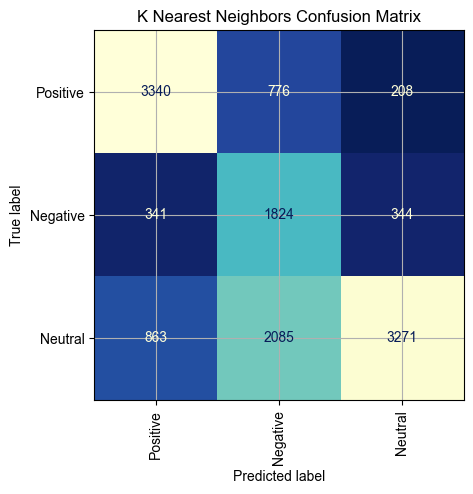

In [58]:
y_predKNN = K_Nearest_Neighbors.predict(X_test_CV_)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusionmatrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')

In [59]:
False_PositiveKNN, True_PositiveKNN = false_true_positive(Confusin_Matrix = ConfusionMatrixKNN)
False_NegativeKNN, True_NegativeKNN = false_true_negative(Confusin_Matrix = ConfusionMatrixKNN)

In [60]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

FalseNegativeRateKNN = false_negative_rate(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
FalsePositiveRateKNN = false_positive_rate(False_Positive =False_PositiveKNN,  True_Negative = True_NegativeKNN)

In [61]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN, False_Negative_Rate = FalseNegativeRateKNN, False_Positive_Rate = FalsePositiveRateKNN)

,Values
Accuracy,0.764174
Precision,0.646261
Sensitivity,0.646261
Specificity,0.823131
F1Score,0.646261
Error,0.235826
False Negative Rate,0.353739
False Positive Rate,0.176869


**5-Random Forest**

In [62]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=300)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_CV_, y_train=y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

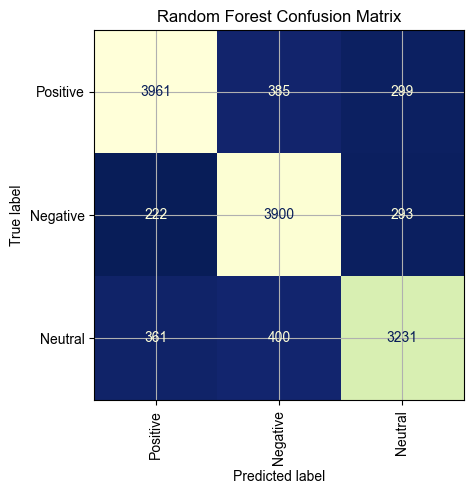

In [63]:
y_predRF = Random_Forest.predict(X_test_CV_)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusionmatrix = ConfusionMatrixRF, name = 'Random Forest')

In [64]:
False_PositiveRF, True_PositiveRF = false_true_positive(Confusin_Matrix = ConfusionMatrixRF)
False_NegativeRF, True_NegativeRF = false_true_negative(Confusin_Matrix = ConfusionMatrixRF)

In [65]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

FalseNegativeRateRF = false_negative_rate(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
FalsePositiveRateRF = false_positive_rate(False_Positive =False_PositiveRF,  True_Negative = True_NegativeRF)

In [66]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF, False_Negative_Rate = FalseNegativeRateRF, False_Positive_Rate = FalsePositiveRateRF)

,Values
Accuracy,0.899888
Precision,0.849831
Sensitivity,0.849831
Specificity,0.924916
F1Score,0.849831
Error,0.100112
False Negative Rate,0.150169
False Positive Rate,0.075084


**6-SGD Classifier**

In [67]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_CV_, y_train=y_train)

SGDClassifier()

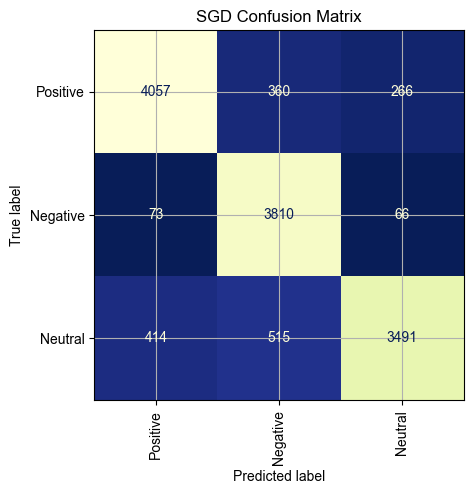

In [68]:
y_predSGD = SGD.predict(X_test_CV_)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSGD, name = 'SGD')

In [69]:
False_PositiveSGD, True_PositiveSGD = false_true_positive(Confusin_Matrix = ConfusionMatrixSGD)
False_NegativeSGD, True_NegativeSGD = false_true_negative(Confusin_Matrix = ConfusionMatrixSGD)

In [70]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

FalseNegativeRateSGD = false_negative_rate(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
FalsePositiveRateSGD = false_positive_rate(False_Positive =False_PositiveSGD,  True_Negative = True_NegativeSGD)

In [71]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD, False_Negative_Rate = FalseNegativeRateSGD, False_Positive_Rate = FalsePositiveRateSGD)

,Values
Accuracy,0.913474
Precision,0.870211
Sensitivity,0.870211
Specificity,0.935106
F1Score,0.870211
Error,0.086526
False Negative Rate,0.129789
False Positive Rate,0.064894


**7-SVM**

In [72]:
Algorithm = SVC(kernel='linear')
SVM = machine_learning_model(algorithm=Algorithm)
fit_model(model=SVM, X_train=X_train_CV_, y_train=y_train)

SVC(kernel='linear')

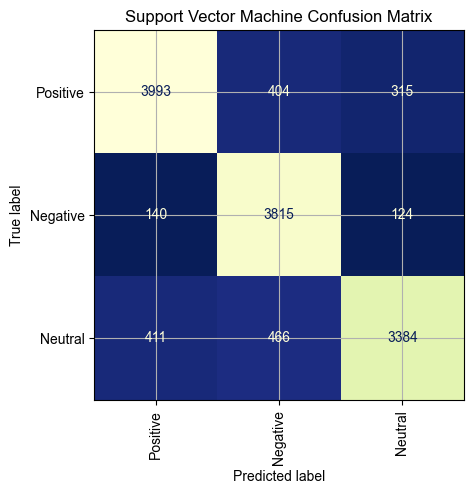

In [73]:
y_predSVM = SVM.predict(X_test_CV_)
ConfusionMatrixSVM = confusion_matrix_(y_test = y_test, y_pred = y_predSVM)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSVM, name = 'Support Vector Machine')

In [74]:
False_PositiveSVM, True_PositiveSVM = false_true_positive(Confusin_Matrix = ConfusionMatrixSVM)
False_NegativeSVM, True_NegativeSVM = false_true_negative(Confusin_Matrix = ConfusionMatrixSVM)

In [75]:
AccuracySVM = accuracy_score(True_Positive = True_PositiveSVM, True_Negative = True_NegativeSVM, False_Positive =False_PositiveSVM, False_Negative = False_NegativeSVM)
PrecisionSVM= precision_score(True_Positive = True_PositiveSVM, False_Positive =False_PositiveSVM)

SensitivitySVM = sensitivity_score(True_Positive = True_PositiveSVM,  False_Negative = False_NegativeSVM)
SpecificitySVM = specificity_score(True_Negative = True_NegativeSVM, False_Positive = False_PositiveSVM)

F1ScoreSVM = f1_score(True_Positive = True_PositiveSVM, False_Negative = False_NegativeSVM, False_Positive = False_PositiveSVM)
ErrorSVM = error_rate(True_Positive = True_PositiveSVM, True_Negative = True_NegativeSVM, False_Positive =False_PositiveSVM, False_Negative = False_NegativeSVM)

FalseNegativeRateSVM = false_negative_rate(True_Positive = True_PositiveSVM,  False_Negative = False_NegativeSVM)
FalsePositiveRateSVM = false_positive_rate(False_Positive =False_PositiveSVM,  True_Negative = True_NegativeSVM)


In [76]:
performance_metrics_data_frame(Accuracy = AccuracySVM, Precision = PrecisionSVM, Sensitivity = SensitivitySVM, Specificity = SpecificitySVM, F1Score = F1ScoreSVM, Error = ErrorSVM, False_Negative_Rate = FalseNegativeRateSVM, False_Positive_Rate = FalsePositiveRateSVM)

,Values
Accuracy,0.904995
Precision,0.857493
Sensitivity,0.857493
Specificity,0.928747
F1Score,0.857493
Error,0.095005
False Negative Rate,0.142507
False Positive Rate,0.071253


**8-MLPClassifier**

In [77]:
Algorithm = MLPClassifier(activation='relu', hidden_layer_sizes=16)
MLP = machine_learning_model(algorithm=Algorithm)
fit_model(model=MLP, X_train=X_train_CV_, y_train=y_train)

MLPClassifier(hidden_layer_sizes=16)

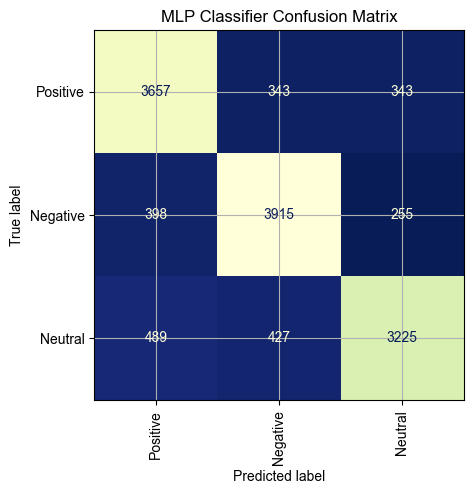

In [78]:
y_predMLP = MLP.predict(X_test_CV_)
ConfusionMatrixMLP = confusion_matrix_(y_test = y_test, y_pred = y_predMLP)
confusion_matrix_display(confusionmatrix = ConfusionMatrixMLP, name = 'MLP Classifier')

In [79]:
False_PositiveMLP, True_PositiveMLP = false_true_positive(Confusin_Matrix = ConfusionMatrixMLP)
False_NegativeMLP, True_NegativeMLP = false_true_negative(Confusin_Matrix = ConfusionMatrixMLP)

In [80]:
AccuracyMLP = accuracy_score(True_Positive = True_PositiveMLP, True_Negative = True_NegativeMLP, False_Positive =False_PositiveMLP, False_Negative = False_NegativeMLP)
PrecisionMLP= precision_score(True_Positive = True_PositiveMLP, False_Positive =False_PositiveMLP)

SensitivityMLP = sensitivity_score(True_Positive = True_PositiveMLP,  False_Negative = False_NegativeMLP)
SpecificityMLP = specificity_score(True_Negative = True_NegativeMLP, False_Positive = False_PositiveMLP)

F1ScoreMLP = f1_score(True_Positive = True_PositiveMLP, False_Negative = False_NegativeMLP, False_Positive = False_PositiveMLP)
ErrorMLP = error_rate(True_Positive = True_PositiveMLP, True_Negative = True_NegativeMLP, False_Positive =False_PositiveMLP, False_Negative = False_NegativeMLP)

FalseNegativeRateMLP = false_negative_rate(True_Positive = True_PositiveMLP,  False_Negative = False_NegativeMLP)
FalsePositiveRateMLP = false_positive_rate(False_Positive =False_PositiveMLP,  True_Negative = True_NegativeMLP)

In [81]:
performance_metrics_data_frame(Accuracy = AccuracyMLP, Precision = PrecisionMLP, Sensitivity = SensitivityMLP, Specificity = SpecificityMLP, F1Score = F1ScoreMLP, Error = ErrorMLP, False_Negative_Rate = FalseNegativeRateMLP, False_Positive_Rate = FalsePositiveRateMLP)

,Values
Accuracy,0.884820
Precision,0.827230
Sensitivity,0.827230
Specificity,0.913615
F1Score,0.827230
Error,0.115180
False Negative Rate,0.172770
False Positive Rate,0.086385


# Build Word2Vec

In [82]:
word_2_vec_(data = Data['Text'], vector_size=100, sg = 0, name = 'ArabicWord2Vec100D')

# Deep Learning

In [83]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test, encoded_y_train, encoded_y_test= deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre', y_train_=y_train, y_test_=y_test)
embedding_dim = 100

In [84]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 47470

The Max Length Is : 922


In [85]:
Arabic_Word_2_Vec_100D = './ArabicWord2Vec100D.txt'
embedding_dic = {}
with open(Arabic_Word_2_Vec_100D) as f:
    for line in f:
        values = line.split()
        word = values[0]
        x = np.asarray(values[1:], dtype='float32')
        embedding_dic[word] = x

In [86]:
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [87]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=3
                )

**9-LSTM**

Epoch 1/10
1632/1632 [==============================] - 217s 131ms/step - loss: 0.5781 - accuracy: 0.7566 - val_loss: 0.3065 - val_accuracy: 0.8596
Epoch 2/10
1632/1632 [==============================] - 196s 120ms/step - loss: 0.2564 - accuracy: 0.8788 - val_loss: 0.2634 - val_accuracy: 0.8711
Epoch 3/10
1632/1632 [==============================] - 195s 119ms/step - loss: 0.2099 - accuracy: 0.8978 - val_loss: 0.2562 - val_accuracy: 0.8729
Epoch 4/10
1632/1632 [==============================] - 203s 124ms/step - loss: 0.1839 - accuracy: 0.9104 - val_loss: 0.2567 - val_accuracy: 0.8721
Epoch 5/10
1632/1632 [==============================] - 222s 136ms/step - loss: 0.1681 - accuracy: 0.9177 - val_loss: 0.2517 - val_accuracy: 0.8760
Epoch 6/10
1632/1632 [==============================] - 214s 131ms/step - loss: 0.1550 - accuracy: 0.9239 - val_loss: 0.2506 - val_accuracy: 0.8749
Epoch 7/10
1632/1632 [==============================] - 206s 126ms/step - loss: 0.1462 - accuracy: 0.9282 - val_

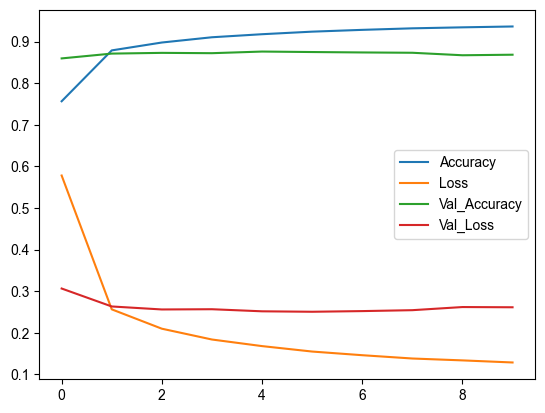

In [88]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.5, units=32, embeddings_matrix = embedding_matrix, units_= 32)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=encoded_y_train, epochs=10, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, Callback=Callback)
plot_changes(histoty=history)  

**10-GRU**

Epoch 1/10
1632/1632 [==============================] - 190s 115ms/step - loss: 0.6527 - accuracy: 0.6816 - val_loss: 0.3164 - val_accuracy: 0.8510
Epoch 2/10
1632/1632 [==============================] - 197s 120ms/step - loss: 0.2576 - accuracy: 0.8762 - val_loss: 0.2628 - val_accuracy: 0.8711
Epoch 3/10
1632/1632 [==============================] - 195s 120ms/step - loss: 0.2085 - accuracy: 0.8979 - val_loss: 0.2573 - val_accuracy: 0.8727
Epoch 4/10
1632/1632 [==============================] - 194s 119ms/step - loss: 0.1823 - accuracy: 0.9102 - val_loss: 0.2584 - val_accuracy: 0.8711
Epoch 5/10
1632/1632 [==============================] - 192s 118ms/step - loss: 0.1667 - accuracy: 0.9176 - val_loss: 0.2549 - val_accuracy: 0.8716
Epoch 6/10
1632/1632 [==============================] - 191s 117ms/step - loss: 0.1559 - accuracy: 0.9228 - val_loss: 0.2583 - val_accuracy: 0.8704
Epoch 7/10
1632/1632 [==============================] - 200s 123ms/step - loss: 0.1483 - accuracy: 0.9262 - val_

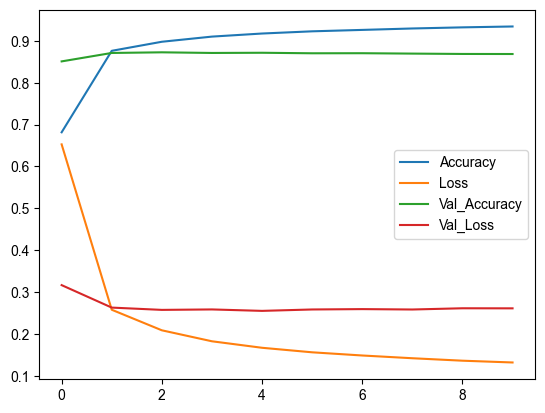

In [89]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.5, units=32, embeddings_matrix = embedding_matrix, units_ = 32)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=encoded_y_train, epochs=10, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, Callback=Callback)
plot_changes(histoty=history)

**11-Bidirectional LSTM** 

Epoch 1/10
1632/1632 [==============================] - 334s 201ms/step - loss: 0.5658 - accuracy: 0.7411 - val_loss: 0.3044 - val_accuracy: 0.8547
Epoch 2/10
1632/1632 [==============================] - 279s 171ms/step - loss: 0.2573 - accuracy: 0.8777 - val_loss: 0.2626 - val_accuracy: 0.8721
Epoch 3/10
1632/1632 [==============================] - 297s 182ms/step - loss: 0.2127 - accuracy: 0.8966 - val_loss: 0.2542 - val_accuracy: 0.8751
Epoch 4/10
1632/1632 [==============================] - 305s 187ms/step - loss: 0.1868 - accuracy: 0.9085 - val_loss: 0.2515 - val_accuracy: 0.8750
Epoch 5/10
1632/1632 [==============================] - 289s 177ms/step - loss: 0.1688 - accuracy: 0.9180 - val_loss: 0.2483 - val_accuracy: 0.8755
Epoch 6/10
1632/1632 [==============================] - 293s 179ms/step - loss: 0.1551 - accuracy: 0.9246 - val_loss: 0.2485 - val_accuracy: 0.8754
Epoch 7/10
1632/1632 [==============================] - 310s 190ms/step - loss: 0.1456 - accuracy: 0.9289 - val_

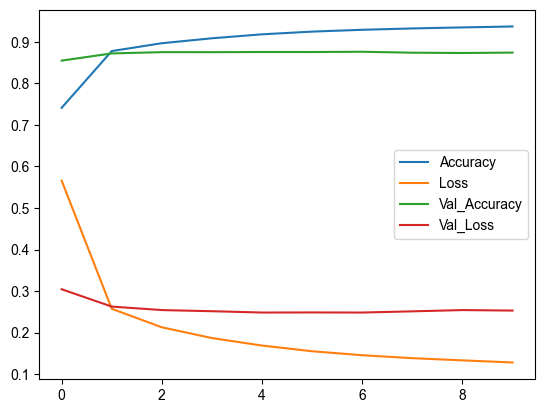

In [90]:
Bidirectional_LSTM=bidirectional_lstm(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units=32, embeddings_matrix = embedding_matrix, units_ = 32)
model_compile(model=Bidirectional_LSTM)
history = model_fit(model=Bidirectional_LSTM, X_train=encoded_X_train, y_train=encoded_y_train, epochs=10, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, Callback=Callback)
plot_changes(histoty=history) 